# Exercise 2: Self Organized Criticality

Mesut Cylan (18-748-012), Syed Shahvaiz Ahmed (18-756-635)
MOEC0559 Agent-based modeling for Business, Economics, Informatics and Social Science
Faculty of Business, Economics and Informatics
29.04.2019

# Modules

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from matplotlib import colors
from IPython.display import HTML
import networkx as nx

# Task 1: Forest Fire Model

Moore Neighbourhood: System Size: L = 100, f = 0.001, tmax = 1000

[12, 19, 24, 25, 36, 57, 61, 66, 67, 100, 103, 107, 110, 116, 117, 123, 124, 161, 179, 194, 202, 203, 206, 219, 225, 235, 239, 240, 241, 243, 250, 251, 252, 261, 263, 265, 275, 276, 292, 314, 316, 320, 321, 323, 345, 346, 351, 352, 353, 357, 372, 377, 388, 402, 407, 425, 427, 432, 452, 459, 464, 471, 473, 477, 480, 483, 491, 503, 508, 527, 528, 534, 536, 540, 546, 552, 554, 556, 557, 570, 575, 578, 599, 601, 608, 614, 624, 626, 632, 641, 643, 644, 647, 649, 652, 663, 681, 682, 685, 696, 700, 718, 720, 733, 754, 760, 765, 766, 775, 795, 809, 810, 812, 818, 823, 827, 828, 829, 831, 832, 857, 859, 861, 863, 881, 884, 887, 888, 889, 890, 898, 925, 930, 932, 943, 966, 967, 969, 979, 990, 995, 1003, 1005, 1007, 1013, 1016, 1017, 1031, 1041, 1043, 1046, 1050, 1061, 1062, 1071, 1075, 1080, 1090, 1091, 1096, 1103, 1106, 1107, 1112, 1118, 1122, 1127, 1128, 1130, 1136, 1138, 1139, 1156, 1158, 1159, 1163, 1164, 1168, 1173, 1183, 1185, 1186, 1192, 1194, 1208, 1214, 1217, 1220, 1228, 1234, 1238, 124

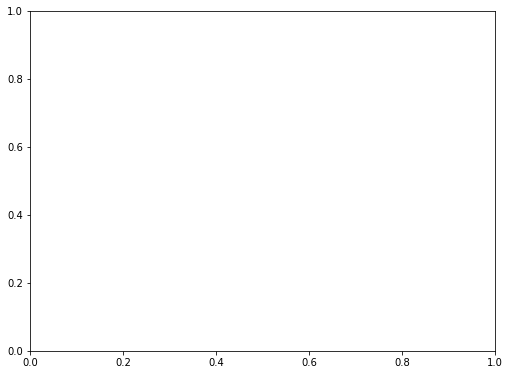

In [44]:
# Displacements from a cell to its eight nearest neighbours
nodes = 100
neighbourhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))
EMPTY, TREE, FIRE = 0, 1, 2
# Colours for visualization: brown for EMPTY, dark green for TREE and orange
# for FIRE. Note that for the colormap to work, this list and the bounds list
# must be one larger than the number of different values in the array.
colors_list = [(0.2,0,0), (0,0.5,0), (1,0,0), 'orange']
cmap = colors.ListedColormap(colors_list)
bounds = [0,1,2,3]
norm = colors.BoundaryNorm(bounds, cmap.N)

def iterate(X):
    """Iterate the forest according to the forest-fire rules."""

    # The boundary of the forest is always empty, so only consider cells
    # indexed from 1 to nx-2, 1 to ny-2
    X1 = np.zeros((ny, nx))
    count_list = []
    count_tree = 0 
    for ix in range(1,nx-1):
        for iy in range(1,ny-1):
            if X[iy,ix] == EMPTY and np.random.random() <= p:
                X1[iy,ix] = TREE
                count_tree+=1
                count_list.append(count_tree)
            if X[iy,ix] == TREE:
                X1[iy,ix] = TREE
                count_tree+=1
            for dx,dy in neighbourhood:
                    if X[iy+dy,ix+dx] == FIRE:
                        X1[iy,ix] = FIRE
                        break
                    else:
                        if np.random.random() <= f:
                            X1[iy,ix] = FIRE
    return count_list

# The initial fraction of the forest occupied by trees.
forest_fraction = 0.2
# Probability of new tree growth per empty cell, and of lightning strike.
p, f = 0.05, 0.001
# Forest size (number of cells in x and y directions).
nx, ny = 100, 100
# Initialize the forest grid.
X  = np.zeros((ny, nx))
X[1:ny-1, 1:nx-1] = np.random.randint(0, 2, size=(ny-2, nx-2))
X[1:ny-1, 1:nx-1] = np.random.random(size=(ny-2, nx-2)) < forest_fraction

print(iterate(X))
fig = plt.figure(figsize=(25/3, 6.25))
ax = fig.add_subplot(111)
# ax.set_axis_off()
# im = ax.imshow(X, cmap=cmap, norm=norm)#, interpolation='nearest')

# The animation function: called to produce a frame for each generation.
# def animate(i):
#     im.set_data(animate.X)
#     animate.X = iterate(animate.X)
# # Bind our grid to the identifier X in the animate function's namespace.
# animate.X = X

# Interval betw  een frames (ms).
# interval = 100
# anim = animation.FuncAnimation(fig, animate, interval=interval)
# plt.show()

In [25]:
nodes = 100
J = nx.grid_2d_graph(int(nodes**0.5),int(nodes**0.5), periodic=True)
K = list(J.nodes)
print(K)

ValueError: sequence too large; cannot be greater than 32

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
